# BDDA PROJECT
## Group 8
### Allstate Claims Severity 

<b><blockquote> Prachi Joshi - 015009<br>
 Pranav Kalra - 015011<br>
 Allan Vetha - 015020<br>
 Pranshik Arora - 015039<br>
 Aanya Sharma - 015053</blockquote></b>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.
from subprocess import check_output
%matplotlib inline

In [2]:
pwd

'/Users/allan'

In [3]:
train = pd.read_csv("/Users/allan/All_State/train.csv")
test = pd.read_csv("/Users/allan/All_State/test.csv")

In [4]:
print("Train data dimensions: ", train.shape)
print("Test data dimensions: ", test.shape)

Train data dimensions:  (188318, 132)
Test data dimensions:  (125546, 131)


In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
#Checking for missing values
print("Number of missing values",train.isnull().sum().sum())

Number of missing values 0


In [8]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### Analyze the distribution of the continuous features

In [9]:
contFeatureslist = []
for colName,x in train.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

In [10]:
print(contFeatureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [11]:
contFeatureslist.remove("id")
contFeatureslist.remove("loss")

In [12]:
contFeatureslist

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa25031f880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa25031ff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa25031f520>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa2532c4640>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2532c49a0>,
 'means': []}

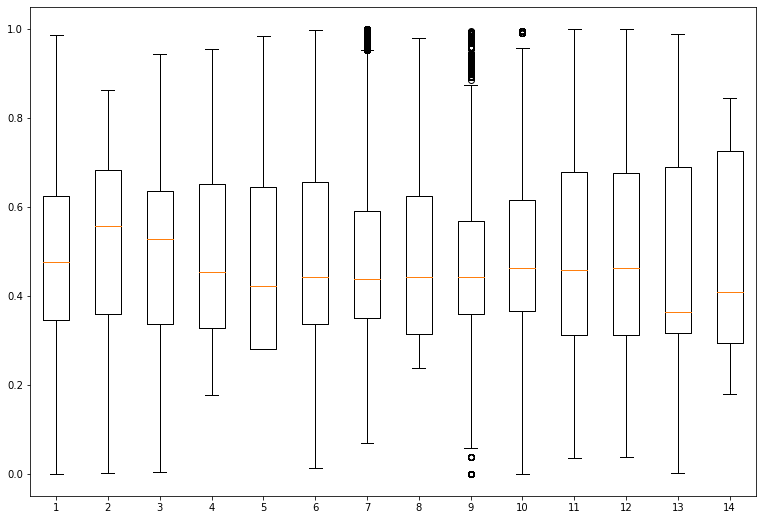

In [13]:
#Box Plots for the continuous features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13,9))
plt.boxplot(train[contFeatureslist])

In [14]:
contFeatureslist.append("loss")

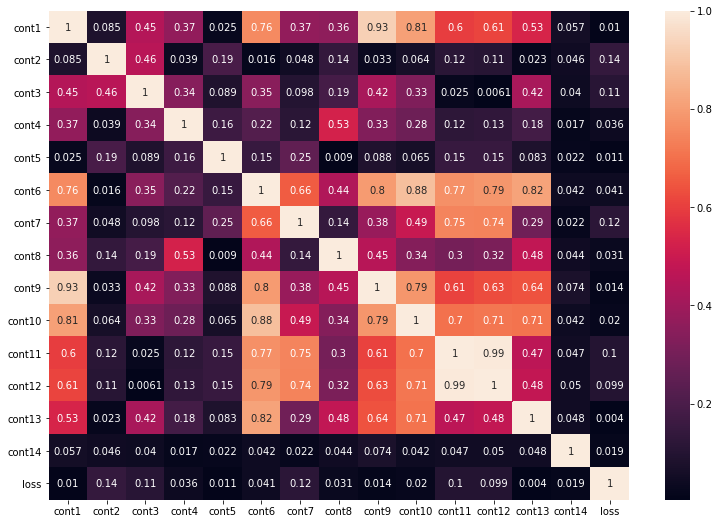

In [15]:
contvar=[col for col in train.columns if 'cont' in col]
correlationMatrix =train[contvar+['loss']].corr().abs()
plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)
plt.show()

<AxesSubplot:xlabel='loss', ylabel='Density'>

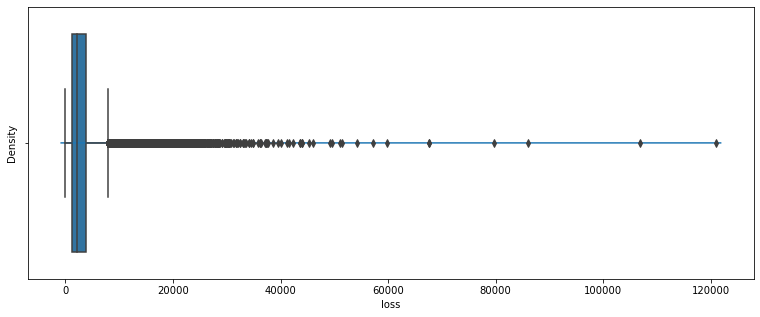

In [19]:
#Analysis of Loss Feature
plt.figure(figsize=(13,5))
sns.distplot(train["loss"])
sns.boxplot(train["loss"])

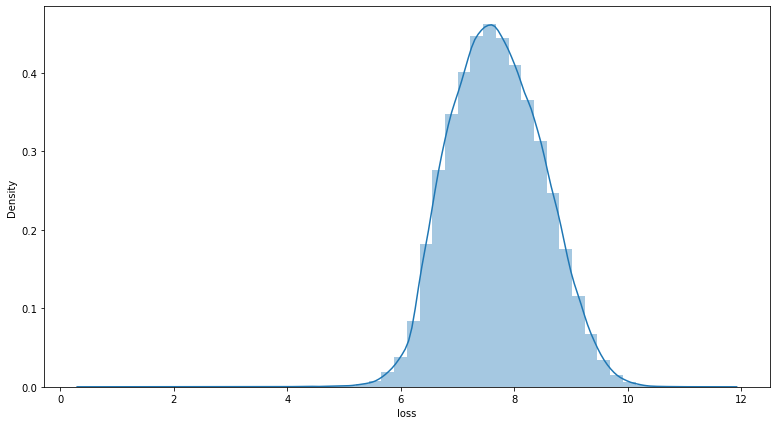

In [20]:
plt.figure(figsize=(13,7))
sns.distplot(np.log1p(train["loss"]))
plt.show()

In [21]:
train = pd.read_csv("/Users/allan/All_State/train.csv")
test = pd.read_csv("/Users/allan/All_State/test.csv")

In [22]:
features = [x for x in train.columns if x not in ['id','loss']]
#print(features)

cat_features = [x for x in train.select_dtypes(include=['object']).columns if x not in ['id','loss']]
num_features = [x for x in train.select_dtypes(exclude=['object']).columns if x not in ['id','loss']]
#print(cat_features)
#print(num_features)

In [29]:
import numpy as np 
import pandas as pd
import xgboost as xgb

from subprocess import check_output
print(check_output(["ls", "/Users/allan/All_State"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# read data
train = pd.read_csv("/Users/allan/All_State/train.csv")
test = pd.read_csv("/Users/allan/All_State/test.csv")

features = [x for x in train.columns if x not in ['id','loss']]
#print(features)

cat_features = [x for x in train.select_dtypes(include=['object']).columns if x not in ['id','loss']]
num_features = [x for x in train.select_dtypes(exclude=['object']).columns if x not in ['id','loss']]
#print(cat_features)
#print(num_features)

sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip



In [39]:
from scipy.stats import norm, lognorm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

train['log_loss'] = np.log(train['loss'])

# fit the normal distribution on ln(loss)
(mu, sigma) = norm.fit(train['log_loss'])

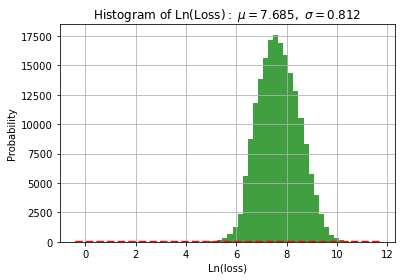

In [46]:
# the histogram of the ln(loss)
n, bins, patches = plt.hist(train['log_loss'], bins=60, facecolor='green', alpha=0.75)

# add the fitted line
y = scipy.stats.norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Ln(loss)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Ln(Loss):}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

### XG Boost

In [47]:
ntrain = train.shape[0]
ntest = test.shape[0]
train_test = pd.concat((train[features], test[features])).reset_index(drop=True)
for c in range(len(cat_features)):
    train_test[cat_features[c]] = train_test[cat_features[c]].astype('category').cat.codes

train_x = train_test.iloc[:ntrain,:]
test_x = train_test.iloc[ntrain:,:]

In [48]:

xgdmat = xgb.DMatrix(train_x, train['log_loss']) # Create our DMatrix to make XGBoost more efficient

params = {'eta': 0.01, 'seed':0, 'subsample': 0.5, 'colsample_bytree': 0.5, 
             'objective': 'reg:linear', 'max_depth':6, 'min_child_weight':3} 

# Grid Search CV optimized settings
num_rounds = 1000
bst = xgb.train(params, xgdmat, num_boost_round = num_rounds)

[19:02:46] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,feature,fscore
0,cat70,0.000018
1,cat69,0.000110
2,cat20,0.000110
3,cat68,0.000128
4,cat48,0.000147
...,...,...
122,cont3,0.025171
123,cont2,0.039058
124,cat100,0.050764
125,cont7,0.059154


<Figure size 432x288 with 0 Axes>

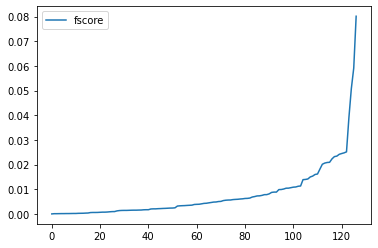

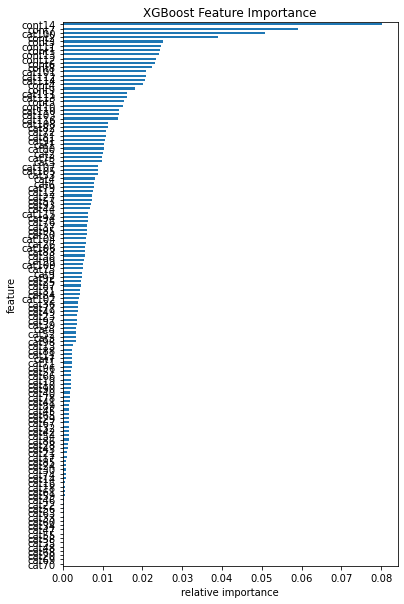

In [49]:
import operator

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
    
ceate_feature_map(features)

importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

df

In [51]:
test_xgb = xgb.DMatrix(test_x)
submission = pd.read_csv("/Users/allan/All_State/sample_submission.csv")
submission.iloc[:, 1] = np.exp(bst.predict(test_xgb))
submission.to_csv('xgb_starter.sub.csv', index=None)

In [52]:
xgb_result = pd.read_csv("/Users/allan/xgb_starter.sub.csv")

In [53]:
xgb_result.head()

,id,loss
0,4,1610.81300
1,6,1993.52840
2,9,9407.41800
3,12,5546.66200
4,15,877.36255


In [54]:
xgb_result

,id,loss
0,4,1610.81300
1,6,1993.52840
2,9,9407.41800
3,12,5546.66200
4,15,877.36255
...,...,...
125541,587617,2085.55800
125542,587621,2204.60840
125543,587627,2409.32350
125544,587629,951.10830
